In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE

In [69]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

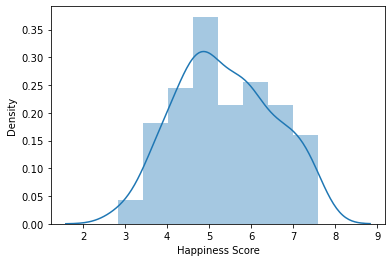

In [70]:
sns.distplot(data['Happiness Score'])


<AxesSubplot:>

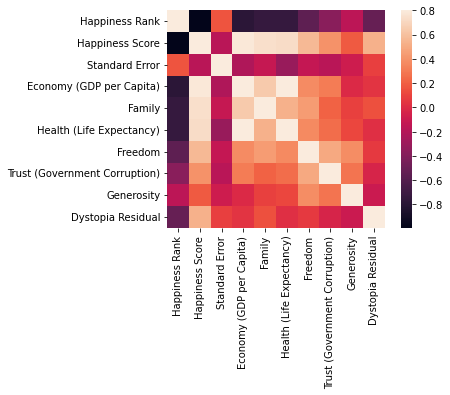

In [71]:
corrmat = data.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

In [72]:
data = data.rename({'Country':'country', 'Region':'region','Happiness score':'happiness_score','Logged GDP per capita':'logged_gdp_per_capita','Social support':'social_support','Health life expectancy':'health_life_expectancy','Freedom  to make life choices':'freedom_to_make_life_choices','Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'})

In [73]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

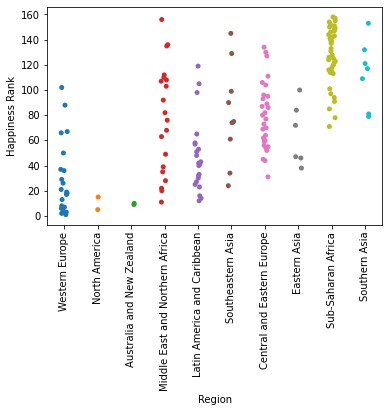

In [48]:
g = sns.stripplot(x="Region", y="Happiness Rank", data=data, jitter=True)
plt.xticks(rotation=90)

In [75]:
y = data['Happiness Score']
X = data.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [83]:
predictions = lm.predict( X_test)


Text(0, 0.5, 'Predicted Y')

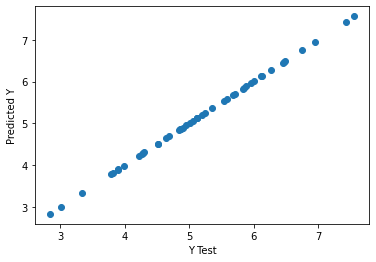

In [84]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [85]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0002686191010087269
MSE: 9.548227095649821e-08
RMSE: 0.00030900205655706926


In [86]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Standard Error,-0.000663
Economy (GDP per Capita),1.000128
Family,0.999810
Health (Life Expectancy),0.999984
Freedom,0.999720
Trust (Government Corruption),0.999885
Generosity,0.999747
Dystopia Residual,0.999955
